In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
main_folder = 'demo'
file = 'shape-hex100nm-4nm' # 'shape-kite80nm-6nm'
kind = 'hex'
lat_space = 2

## Plot Shape File from Crystal Creator

Make sure the shape file you created is the one you wanted! Note that the single crystal and twinned shapes are formed on different axes. Thus the different plotting schemes.  

Metal Thickness (x): 24 nm
Metal Length (y): 96 nm
Metal Width (z): 84 nm 

Shell Thickness (x): 2 nm, 2 nm
Shell Length (y): 4 nm, 4 nm
Shell Width (z): 2 nm, 2 nm


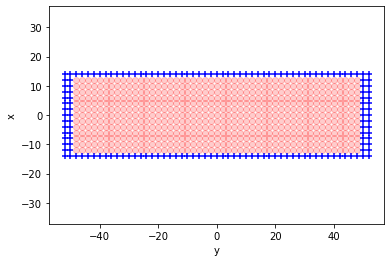

In [3]:
data = np.loadtxt(str('../create_files/')+str(main_folder)+str('/shapes_from_cc/')+str(file)+str('.dat'),skiprows=7)

if kind == 'hex':
    x = data[:,3]*lat_space
    y = data[:,1]*lat_space
    z = data[:,2]*lat_space
    ICOMP = data[:,4]

    idx_plotm = np.where((ICOMP==1) & (z==0))
    idx_plots = np.where((ICOMP==2) & (z==0))

    plt.scatter(y[idx_plotm], x[idx_plotm], c='red',alpha=.2)
    plt.scatter(y[idx_plots], x[idx_plots], marker='+',c='blue')
    plt.axis('equal');
    plt.xlabel('y'); plt.ylabel('x');

    idx_m = np.where(ICOMP==1)
    idx_s = np.where(ICOMP==2)
    print('Metal Thickness (x):', int((max(x[idx_m])-min(x[idx_m]))), 'nm')
    print('Metal Length (y):', int((max(y[idx_m])-min(y[idx_m]))), 'nm')
    print('Metal Width (z):', int((max(z[idx_m])-min(z[idx_m]))), 'nm', '\n')

    if 2 in ICOMP:
        print('Shell Thickness (x):', int((max(x[idx_s])-max(x[idx_m]))),'nm,', int((-min(x[idx_s])+min(x[idx_m]))), 'nm')
        print('Shell Length (y):', int((max(y[idx_s])-max(y[idx_m]))),'nm,', int((-min(y[idx_s])+min(y[idx_m]))), 'nm')
        print('Shell Width (z):', int((max(z[idx_s])-max(z[idx_m]))),'nm,', int((-min(z[idx_s])+min(z[idx_m]))), 'nm')
    else:
        print('No shell')
        
        
if kind == 'chair' or kind == 'taco' or kind == 'kite' or kind == 'tent':
    x = data[:,1]*lat_space
    y = data[:,2]*lat_space
    z = data[:,3]*lat_space
    ICOMP = data[:,4]

    idx_plotm = np.where((ICOMP==1) & (y==0))
    idx_plots = np.where((ICOMP==2) & (y==0))
    plt.scatter(z[idx_plotm], x[idx_plotm], c='darkcyan',alpha=.2)
    plt.scatter(z[idx_plots], x[idx_plots], marker='+',c='lime')
    plt.axis('equal');
    plt.xlabel('z'); plt.ylabel('x');

    idx_m = np.where(ICOMP==1)

    #### Find lower point ####
    #################################################################################
    idx_minz = np.where(z[idx_m] == min(z[idx_m]))[0]
    x_minz = x[idx_minz]; y_minz = y[idx_minz]; z_minz = z[idx_minz]
    idx_y0 = np.where(y_minz == 0)[0]
    x_minz_y0 = x_minz[idx_y0]; y_minz_y0 = y_minz[idx_y0]; z_minz_y0 = z_minz[idx_y0]
    idx_maxx = np.where(x_minz_y0 == min(x_minz_y0))[0]
    x_minz_y0_maxx = x_minz_y0[idx_maxx]; y_minz_y0_maxx = y_minz_y0[idx_maxx]; z_minz_y0_maxx = z_minz_y0[idx_maxx]; 
    plt.scatter(z_minz_y0_maxx, x_minz_y0_maxx, color='magenta')

    ### Find upper point ####
    ################################################################################
    idx_maxx = np.where(x[idx_m] == max(x[idx_m]))[0]
    x_maxx = x[idx_maxx]; y_maxx = y[idx_maxx]; z_maxx = z[idx_maxx]
    idx_y0 = np.where(y_maxx == 0)[0]
    x_maxx_y0 = x_maxx[idx_y0]; y_maxx_y0 = y_maxx[idx_y0]; z_maxx_y0 = z_maxx[idx_y0]
    idx_minz = np.where(z_maxx_y0 == min(z_maxx_y0))[0]
    x_maxx_y0_minz = x_maxx_y0[idx_minz]; y_maxx_y0_minz = y_maxx_y0[idx_minz]; z_maxx_y0_minz = z_maxx_y0[idx_minz]
    plt.scatter(z_maxx_y0_minz, x_maxx_y0_minz, color='magenta')

    if len(x_minz_y0_maxx) > 1: print('not done')
    if len(x_maxx_y0_minz) > 1: print('not done')

    thick = np.sqrt( (x_minz_y0_maxx[0]-x_maxx_y0_minz[0])**2 +
                (y_minz_y0_maxx[0]-y_maxx_y0_minz[0])**2 +
                (z_minz_y0_maxx[0]-z_maxx_y0_minz[0])**2 )
    print('Metal Thick (x):', int(np.round(thick)), 'nm')


    idx_s = np.where(ICOMP==2)
    print('Metal Length (y):', int((max(y[idx_m])-min(y[idx_m]))), 'nm')
    print('Metal Width (z):', int((max(z[idx_m])-min(z[idx_m]))), 'nm', '\n')
    
    if 2 in ICOMP:
        print('Shell Thickness (x):', int((max(x[idx_s])-max(x[idx_m]))),'nm,', int((-min(x[idx_s])+min(x[idx_m]))), 'nm')
        print('Shell Length (y):', int((max(y[idx_s])-max(y[idx_m]))),'nm,', int((-min(y[idx_s])+min(y[idx_m]))), 'nm')
        print('Shell Width (z):', int((max(z[idx_s])-max(z[idx_m]))),'nm,', int((-min(z[idx_s])+min(z[idx_m]))), 'nm')
    else:
        print('No shell')


        
        
        
        
        
        
        
        
        
